##  Analysis of the Titanic Survival Dataset 
### Load the dataset

In [1]:
import pandas as pd

titanic = pd.read_csv('TitanicSurvival.csv')  
titanic.columns = ['name', 'survived', 'sex', 'age', 'passengerClass']

pd.set_option('precision', 2)  # format for floating-point values
titanic.head()

,name,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [2]:
titanic.tail()

,name,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


## Age counts

In [3]:
import math

passenger_count = len(titanic.age)

good_ages = [age for age in titanic.age if not math.isnan(age)]
good_ages_count = len(good_ages)

mean_age = sum(good_ages)/good_ages_count

print(f'count of all  ages = {passenger_count}')
print(f'count of good ages = {good_ages_count}')
print(f' mean of good ages = {mean_age:.2f}')

count of all  ages = 1309
count of good ages = 1046
 mean of good ages = 29.88


In [4]:
sorted_good_ages = sorted(good_ages)
print(f'len(sorted(good_ages)) = {len(sorted_good_ages)}')

len(sorted(good_ages)) = 1046


## Descriptive age statistics

In [5]:
titanic.describe()# descriptive stat

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a935d50>]],
      dtype=object)

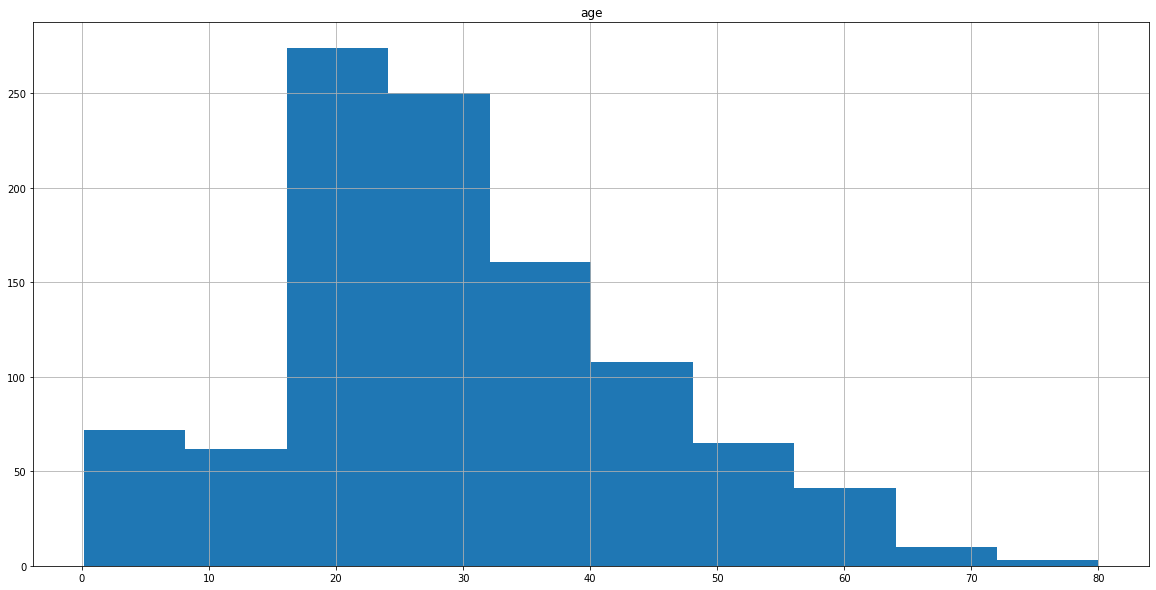

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
titanic.hist()  # passenger age only

In [7]:
min_age = sorted_good_ages[0]
max_age = sorted_good_ages[-1]

print(f'min of ages = {min_age:.2f}')
print(f'max of ages = {max_age:.2f}')

min of ages = 0.17
max of ages = 80.00


## Age mean, median, variance, and standard deviation

#### Use the statistics module

In [8]:
import statistics as stat

print(f'stat.mean      = {stat.mean(good_ages):.2f}')
print(f'stat.median    = {stat.median(good_ages):.2f}')
print(f'stat.pvariance = {stat.pvariance(good_ages):.2f}')
print(f'stat.pstdev    = {stat.pstdev(good_ages):.2f}')

stat.mean      = 29.88
stat.median    = 28.00
stat.pvariance = 207.55
stat.pstdev    = 14.41


#### Compute from the definitions

In [9]:
mid = good_ages_count//2

if good_ages_count%2 == 1:
    median_age = sorted_good_ages[mid+1]
else:
    median_age = (sorted_good_ages[mid] + sorted_good_ages[mid+1])/2
    
print(f'median of good ages = {median_age:.2f}')

median of good ages = 28.00


In [10]:
sum_of_squares = 0

for age in good_ages:
    sum_of_squares += (age - mean_age)**2
    
variance = sum_of_squares/good_ages_count
stdev    = math.sqrt(variance)

print(f'sum sqrs of ages = {sum_of_squares:.2f}')
print(f'variance of ages = {variance:.2f}')
print(f' std dev of ages = {stdev:.2f}')

sum sqrs of ages = 217097.68
variance of ages = 207.55
 std dev of ages = 14.41


## Ages in each passenger class

In [11]:
def ages_in_class(klass):
    """ 
    Return the list of ages of passengers in a given class.
    @param klass the given class.
    @return the list of ages.
    """
    
    return [age for age, kls in zip(titanic.age, titanic.passengerClass) 
                         if not math.isnan(age) and (kls == klass)]

In [12]:
ages_1st_class = ages_in_class('1st')
ages_2nd_class = ages_in_class('2nd')
ages_3rd_class = ages_in_class('3rd')

print(f'Found {len(ages_1st_class)} ages in 1st class')
print(f'Found {len(ages_2nd_class)} ages in 2nd class')
print(f'Found {len(ages_3rd_class)} ages in 3rd class')

total_ages = len(ages_1st_class) + len(ages_2nd_class) + len(ages_3rd_class)

print()
print(f'{total_ages} total ages found')

Found 284 ages in 1st class
Found 261 ages in 2nd class
Found 501 ages in 3rd class

1046 total ages found


## Survival rate of each passenger class

In [13]:
def status_in_class(klass, status):
    """
    Compute the number of passengers in a given passenger class
    and how many of them survived or perished.
    @param klass the given class.
    @param status either 'yes' for survived, or 'no' if perished
    @return a tuple containing the number of passengers 
            and the number who survived or perished
    """
    
    class_count  = 0
    status_count = 0
    
    for srv, kls in zip(titanic.survived, titanic.passengerClass):
        if kls == klass:  # the class that we want?
            class_count += 1
            
            if srv == status:  # survived or perished in that class?
                status_count += 1
                
    return (class_count, status_count)

In [14]:
count_1st, survived_1st = status_in_class('1st', 'yes')
count_2nd, survived_2nd = status_in_class('2nd', 'yes')
count_3rd, survived_3rd = status_in_class('3rd', 'yes')

# We already have the counts in each class.
count, perished_1st = status_in_class('1st', 'no')
count, perished_2nd = status_in_class('2nd', 'no')
count, perished_3rd = status_in_class('3rd', 'no')

total_passengers = len(titanic.survived)
total_survived   = survived_1st + survived_2nd + survived_3rd
total_perished   = perished_1st + perished_2nd + perished_3rd

print(f'Out of {total_passengers} total passengers, ' +
      f'{total_survived} survived = {int(100*total_survived/total_passengers)}% ' +
      f'and {total_perished} perished = {int(100*total_perished/total_passengers)}%')
print()

print(f'Out of {count_1st} passengers in 1st class, ' +
      f'{survived_1st} survived = {int(100*survived_1st/total_survived)}%')
print(f'Out of {count_2nd} passengers in 2nd class, ' +
      f'{survived_2nd} survived = {int(100*survived_2nd/total_survived)}%')
print(f'Out of {count_3rd} passengers in 3rd class, ' +
      f'{survived_3rd} survived = {int(100*survived_3rd/total_survived)}%')

Out of 1309 total passengers, 500 survived = 38% and 809 perished = 61%

Out of 323 passengers in 1st class, 200 survived = 40%
Out of 277 passengers in 2nd class, 119 survived = 23%
Out of 709 passengers in 3rd class, 181 survived = 36%


In [15]:
(titanic.survived == 'no').describe()

count     1309
unique       2
top       True
freq       809
Name: survived, dtype: object

## Charts: Passengers in each class

#### Custom pie chart code

Count of passengers in each class


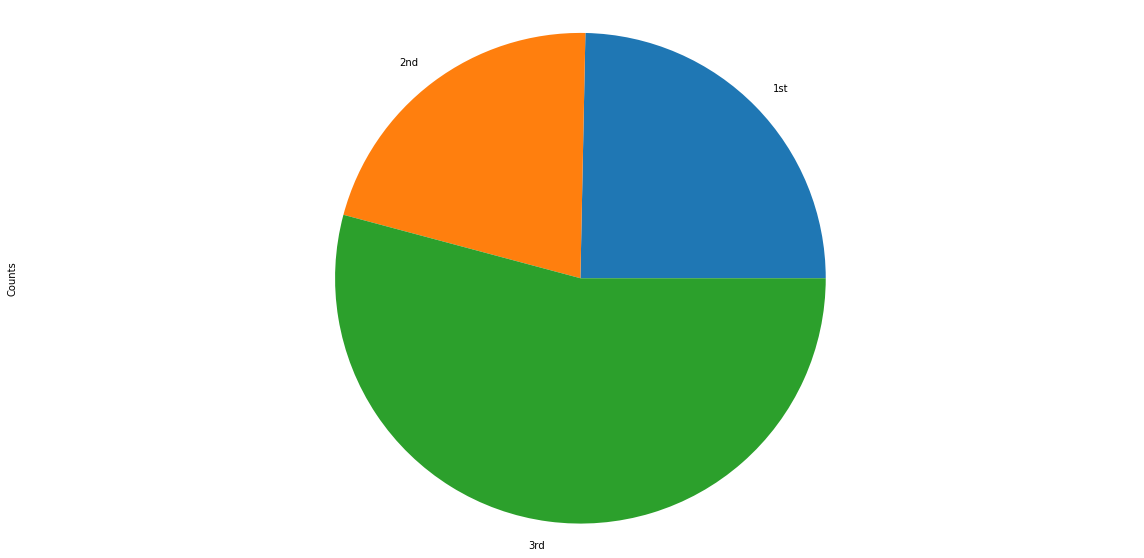

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

print('Count of passengers in each class')

df_count_pie = pd.DataFrame({'Class' : ['1st', '2nd', '3rd'], 
                             'Counts' : [count_1st, count_2nd, count_3rd]})
df_count_pie.Counts.groupby(df_count_pie.Class).sum().plot(kind='pie')
plt.axis('equal')
plt.show()

#### Pie chart function

In [17]:
def show_pie_chart(title, wedge_labels, wedge_values):
    """
    Display a pie chart.
    @param title the chart title.
    @param wedge_labels the labels for the wedges
    @param wedge_values the values for the wedges
    """
    
    print(title)
    
    df_count_pie = pd.DataFrame({'Class' : wedge_labels, 
                                 'Counts' : wedge_values})
    df_count_pie.Counts.groupby(df_count_pie.Class).sum().plot(kind='pie')
    plt.axis('equal')
    plt.show()

Count of passengers in each class


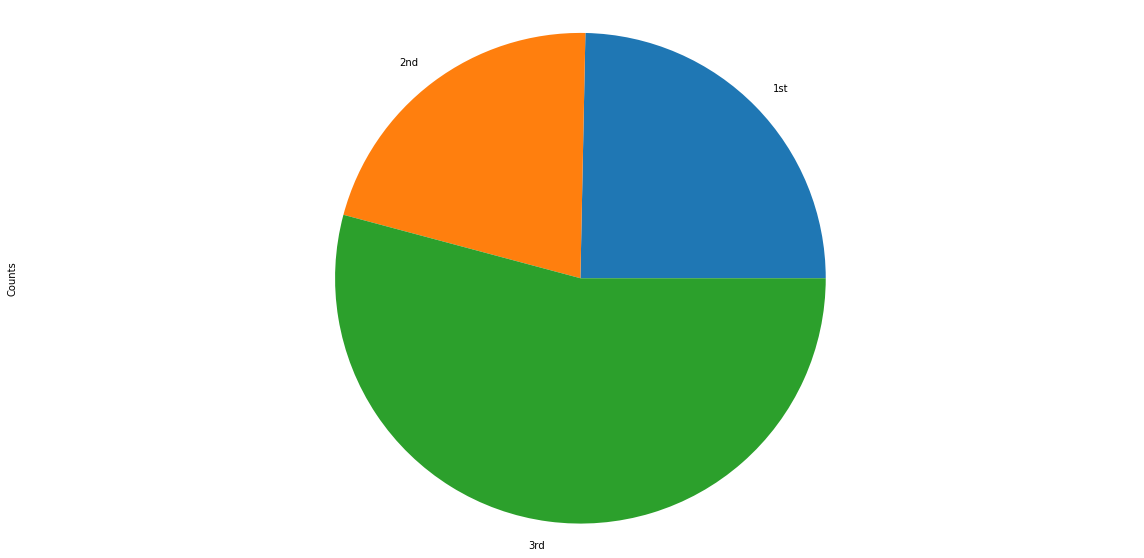

In [18]:
classes = ['1st', '2nd', '3rd']
counts  = [count_1st, count_2nd, count_3rd]

show_pie_chart('Count of passengers in each class', classes, counts)

#### Custom bar chart code

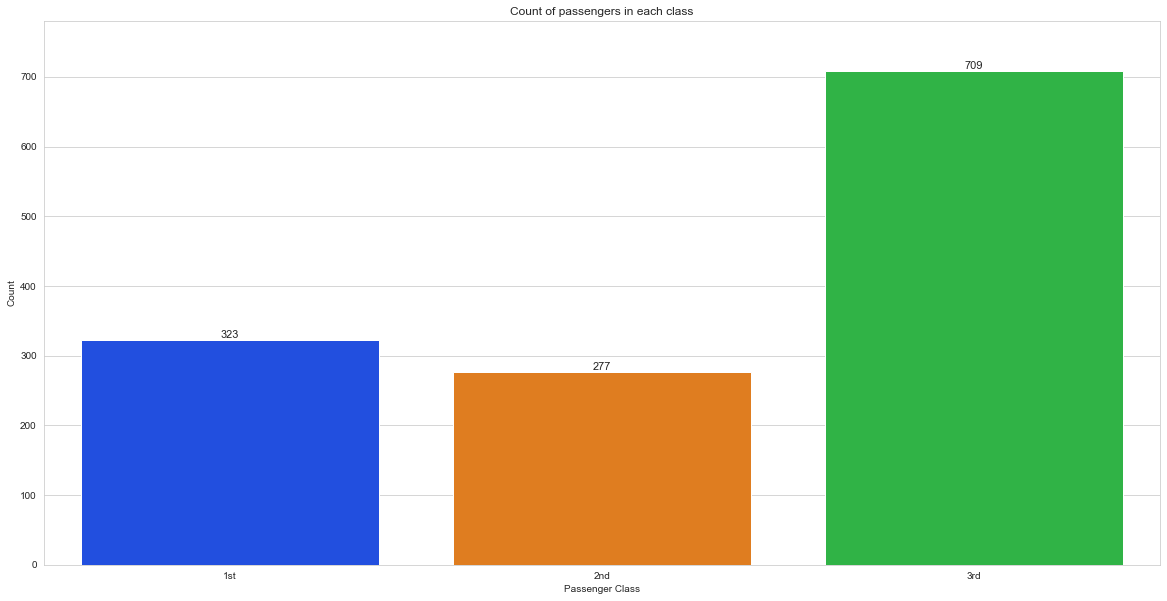

In [19]:
import seaborn as sns

classes = ['1st', '2nd', '3rd']
counts  = [count_1st, count_2nd, count_3rd]

sns.set_style('whitegrid')  # white backround with gray grid lines
axes = sns.barplot(classes, counts, palette='bright')
axes.set_title('Count of passengers in each class')
axes.set(xlabel='Passenger Class', ylabel='Count')

# Scale the y-axis by 10% to make room for text above the bars.
axes.set_ylim(top=1.10*max(counts))

# Display the count above each patch (bar).
for bar, count in zip(axes.patches, counts):
    text_x = bar.get_x() + bar.get_width()/2  
    text_y = bar.get_height() 
    text   = f'{count}'
    axes.text(text_x, text_y, text, 
              fontsize=11, ha='center', va='bottom')

plt.show()  # display the chart 

#### Bar chart function

In [20]:
import seaborn as sns

def show_bar_chart(title, x_labels, y_label, x_values, y_values, bar_topper):
    """
    Display a bar chart.
    @param title the chart title.
    @param x_labels the labels for the x axis
    @param y_label  the label for the y axis
    @param x_values the x values to plot
    @param y_values the y values to plot
    @param bar_text the text above each bar
    """
    
    sns.set_style('whitegrid')  # white backround with gray grid lines
    axes = sns.barplot(x_values, y_values, palette='bright')
    axes.set_title(title)
    axes.set(xlabel=x_labels, ylabel=y_label)

    # Scale the y-axis by 10% to make room for text above the bars.
    axes.set_ylim(top=1.10*max(y_values))

    # Display the percentage above each patch (bar).
    for bar, topper in zip(axes.patches, bar_topper):
        text_x = bar.get_x() + bar.get_width() / 2.0  
        text_y = bar.get_height() 
        axes.text(text_x, text_y, topper, 
                  fontsize=11, ha='center', va='bottom')

    plt.show()  # display the chart 

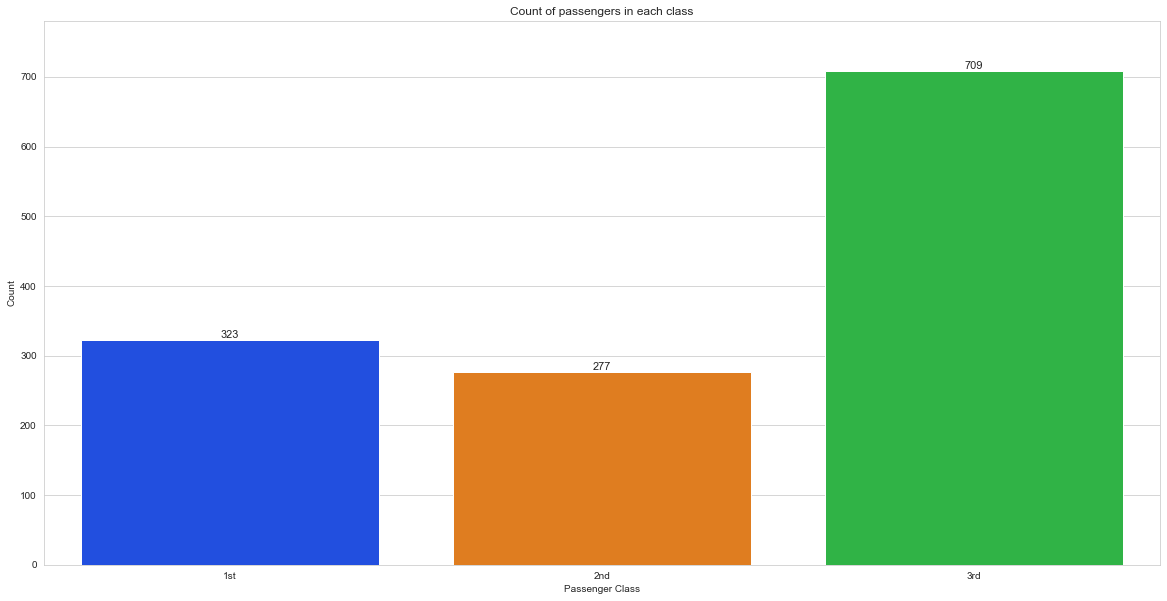

In [21]:
classes = ['1st', '2nd', '3rd']
counts  = [count_1st, count_2nd, count_3rd]
toppers = [f'{count_1st}', f'{count_2nd}', f'{count_3rd}']

show_bar_chart('Count of passengers in each class', 
               'Passenger Class', 'Count', 
               classes, counts, toppers)

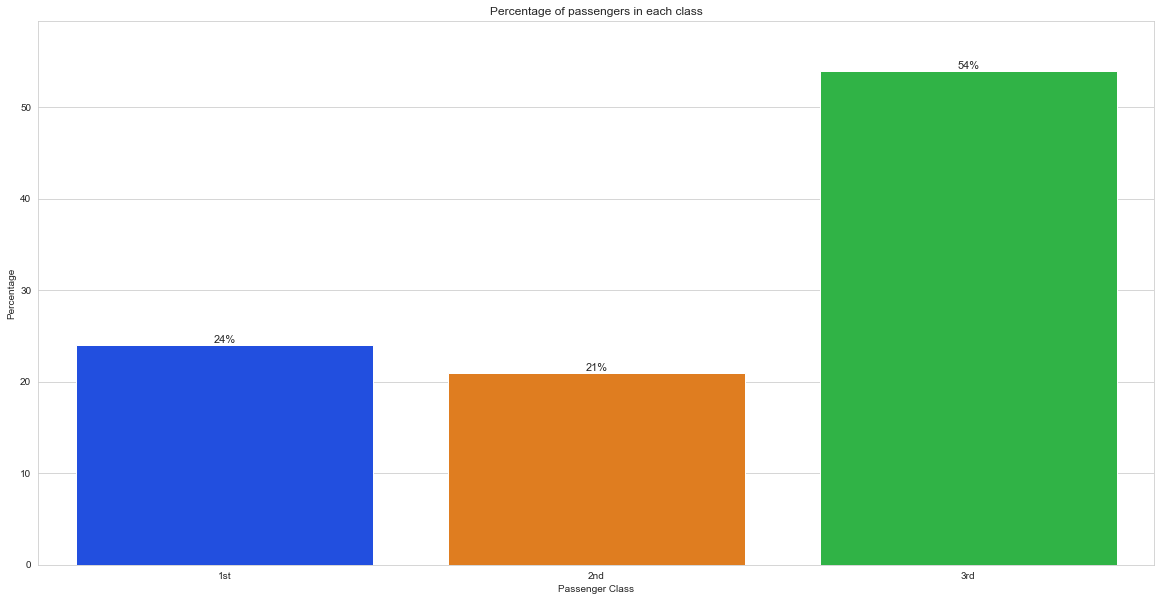

In [22]:
total_passengers = len(titanic.name)
pct_total_1st    = 100*count_1st/total_passengers
pct_total_2nd    = 100*count_2nd/total_passengers
pct_total_3rd    = 100*count_3rd/total_passengers

classes  = ['1st', '2nd', '3rd']
pcts     = [int(pct_total_1st), int(pct_total_2nd), int(pct_total_3rd)]
toppers  = [f'{pcts[0]}%', f'{pcts[1]}%', f'{pcts[2]}%']

show_bar_chart('Percentage of passengers in each class',
               'Passenger Class', 'Percentage', 
               classes, pcts, toppers)

## Charts: Survival rates in each passenger class

Count of survivors in each class


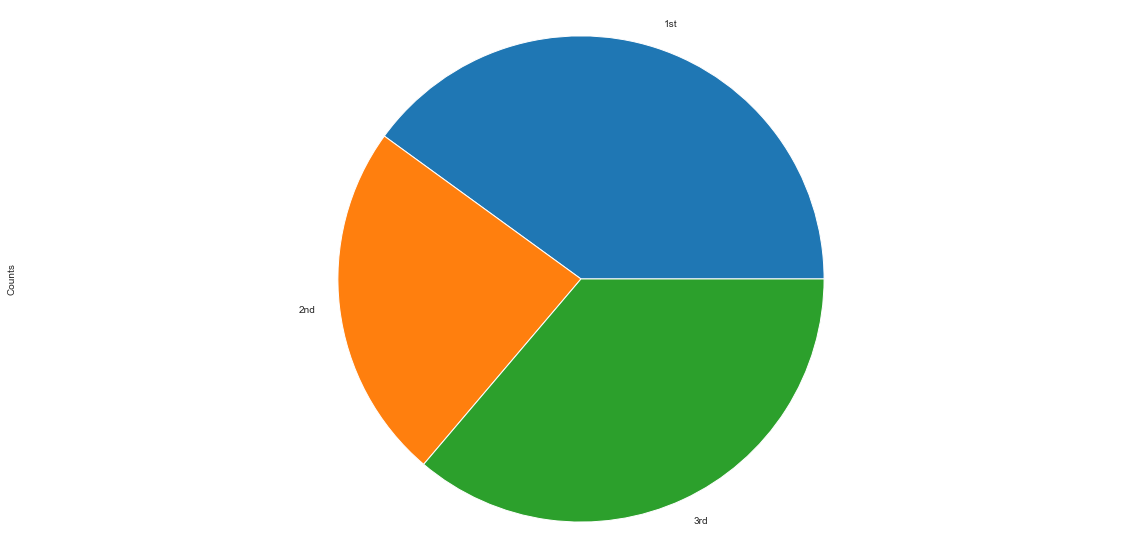

In [23]:
classes = ['1st', '2nd', '3rd']
counts  = [survived_1st, survived_2nd, survived_3rd]

show_pie_chart('Count of survivors in each class', classes, counts)

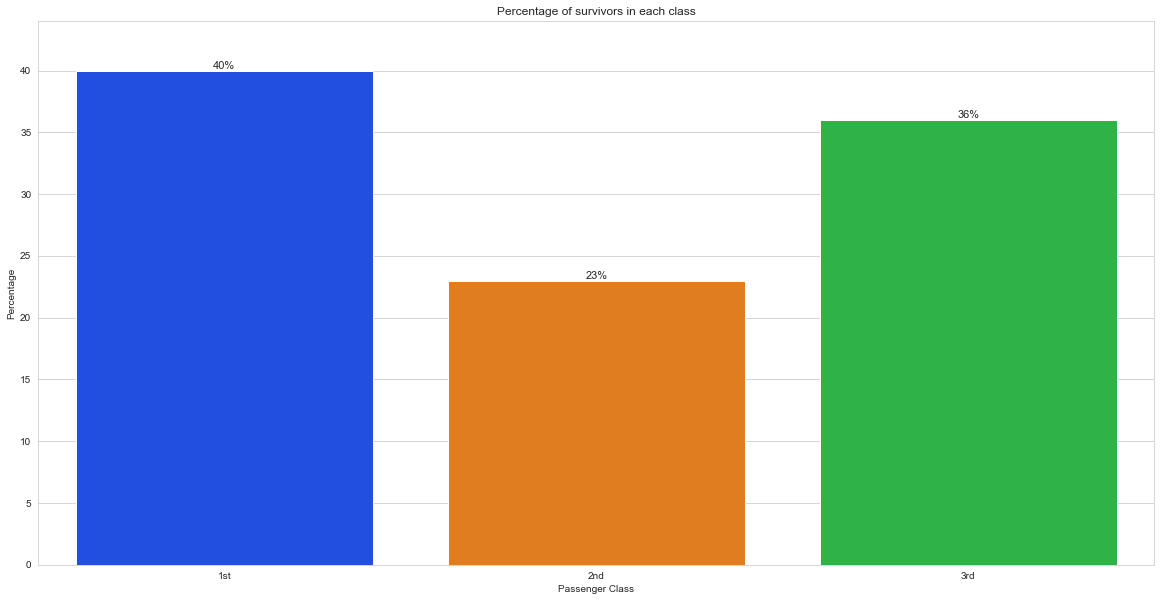

In [24]:
total_survivors  = survived_1st + survived_2nd + survived_3rd 
pct_survived_1st = 100*survived_1st/total_survivors
pct_survived_2nd = 100*survived_2nd/total_survivors
pct_survived_3rd = 100*survived_3rd/total_survivors

classes  = ['1st', '2nd', '3rd']
pcts     = [int(pct_survived_1st), int(pct_survived_2nd), int(pct_survived_3rd)]
toppers  = [f'{pcts[0]}%', f'{pcts[1]}%', f'{pcts[2]}%']

show_bar_chart('Percentage of survivors in each class',
               'Passenger Class', 'Percentage', 
               classes, pcts, toppers)

## Age quartiles and interquartile range (IQR) by passenger class

In [25]:
import numpy as np

def age_iqr_for_class(klass):
    """
    Compute the count, min, max, 1st, 2nd, and 3rd quartiles, 
    and the interquartile range for ages in a given class.
    @param klass the given class.
    @return a tuple containing count, min, max, 1st, 2nd, and 3rd quartiles, 
            and the IQR.
    """
    
    ages    = ages_in_class(klass)
    count   = len(ages)
    min_age = min(ages)
    max_age = max(ages)
    
    q1  = np.percentile(ages, 25)
    q2  = np.percentile(ages, 50)
    q3  = np.percentile(ages, 75)
    iqr = q3 - q1
    
    return (count, min_age, max_age, q1, q2, q3, iqr)

#### 1st class

In [26]:
count_1st, min_1st, max_1st, q1_1st, q2_1st, q3_1st, iqr_1st = age_iqr_for_class('1st')

print(f'count_1st = {count_1st}')
print(f'min_1st   = {min_1st:.2f}')
print(f'max_1st   = {max_1st}')
print(f'q1_1st    = {q1_1st}')
print(f'q2_1st    = {q2_1st}')
print(f'q3_1st    = {q3_1st}')
print(f'iqr_1st   = {iqr_1st}')

count_1st = 284
min_1st   = 0.92
max_1st   = 80.0
q1_1st    = 28.0
q2_1st    = 39.0
q3_1st    = 50.0
iqr_1st   = 22.0


#### 2nd class

In [27]:
count_2nd, min_2nd, max_2nd, q1_2nd, q2_2nd, q3_2nd, iqr_2nd = age_iqr_for_class('2nd')

print(f'count_2nd = {count_2nd}')
print(f'min_2nd   = {min_2nd:.2f}')
print(f'max_2nd   = {max_2nd}')
print(f'q1_2nd    = {q1_2nd}')
print(f'q2_2nd    = {q2_2nd}')
print(f'q3_2nd    = {q3_2nd}')
print(f'iqr_2nd   = {iqr_2nd}')

count_2nd = 261
min_2nd   = 0.67
max_2nd   = 70.0
q1_2nd    = 22.0
q2_2nd    = 29.0
q3_2nd    = 36.0
iqr_2nd   = 14.0


#### 3rd class

In [28]:
count_3rd, min_3rd, max_3rd, q1_3rd, q2_3rd, q3_3rd, iqr_3rd = age_iqr_for_class('3rd')

print(f'count_3rd = {count_3rd}')
print(f'min_3rd   = {min_3rd:.2f}')
print(f'max_3rd   = {max_3rd}')
print(f'q1_3rd    = {q1_3rd}')
print(f'q2_3rd    = {q2_3rd}')
print(f'q3_3rd    = {q3_3rd}')
print(f'iqr_3rd   = {iqr_3rd}')

count_3rd = 501
min_3rd   = 0.17
max_3rd   = 74.0
q1_3rd    = 18.0
q2_3rd    = 24.0
q3_3rd    = 32.0
iqr_3rd   = 14.0


## Box chart of age ranges within each passenger class

Box chart of age ranges by class


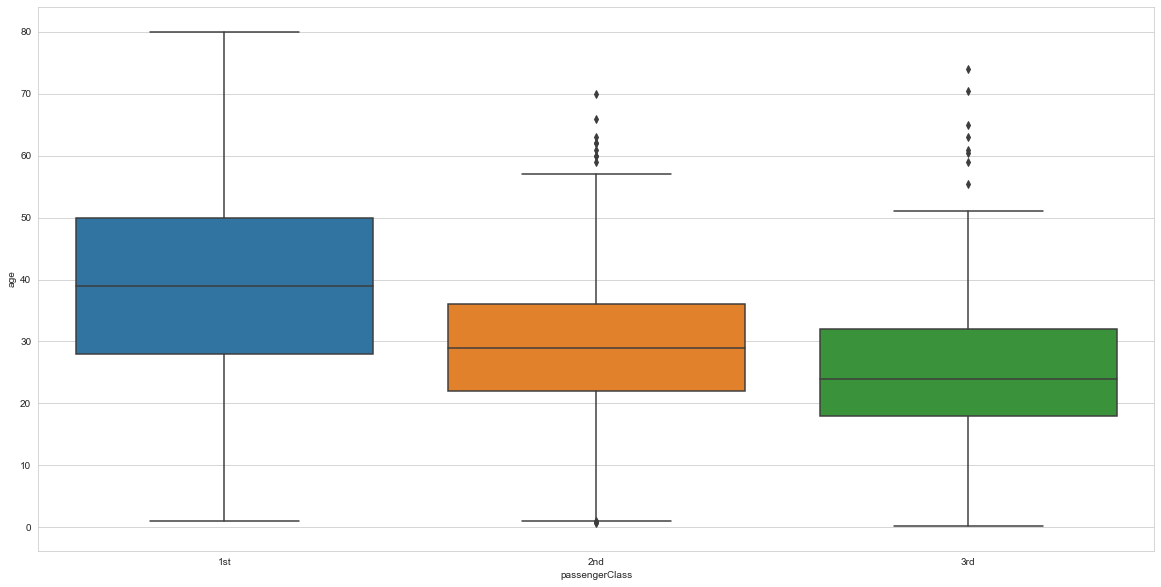

In [29]:
import seaborn as sns

print('Box chart of age ranges by class')
boxplot = sns.boxplot(y='age', x='passengerClass', data=titanic)

## Insightful conclusions? What decisions to make?

#### Further analyses: survival rates by age and by gender -- in each passenger class.